In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt


In [ ]:
data="""Humidity,Temperature,Pollutant,DustDensity,AQI
72.30,27.50,90.00,589.26,136
72.30,27.40,90.00,160.11,106
72.30,27.50,89.00,0.10,98
72.30,27.50,85.00,377.59,96
72.40,27.50,92.00,793.45,97
72.30,27.40,87.00,603.37,101
72.30,27.40,90.00,92.87,100
72.30,27.50,87.00,37.25,98
72.30,27.50,87.00,135.20,99
68.21,28.12,80.15,450.34,92
65.47,29.01,72.50,510.21,85
70.00,26.80,75.00,480.00,88
75.12,25.40,90.00,620.50,110
80.00,23.00,50.00,100.00,78
55.00,30.00,100.00,800.00,150
90.00,22.50,40.00,50.00,60
85.00,28.50,60.00,200.00,80
78.00,31.50,110.00,900.00,180
60.00,33.00,30.00,10.00,50
75.50,24.75,95.25,750.80,140
82.12,22.80,49.40,120.47,70
65.00,27.00,88.88,399.99,100
70.50,28.50,102.20,850.10,160
77.77,26.26,79.79,640.40,105
50.50,30.50,66.66,340.12,85
55.55,25.55,55.55,255.55,75
68.68,29.29,77.77,500.50,110
90.90,21.21,22.22,33.33,40
85.85,32.32,45.45,150.15,60
72.72,24.24,123.45,925.92,190
60.60,28.28,99.99,699.96,130
63.63,20.20,80.80,404.04,95
79.79,22.22,111.11,888.88,180
66.66,26.26,88.88,600.60,125
59.59,29.29,77.77,470.47,105
92.92,19.19,66.66,333.33,80
55.55,31.31,120.00,999.99,200
80.80,23.23,35.35,125.12,65
77.77,21.21,58.58,300.33,85
68.68,18.18,102.02,650.65,150
61.61,26.26,89.00,455.55,115
69.69,29.29,95.50,550.55,145
58.58,28.28,83.33,399.00,105
62.62,30.30,77.00,440.44,110
51.51,27.27,68.68,333.33,90
74.74,24.24,110.11,770.77,170
64.64,22.22,47.47,222.22,75
70.70,31.31,99.99,520.52,135
56.56,25.25,120.00,888.88,185
82.82,20.20,52.52,150.15,65
91.91,29.29,36.36,109.09,55
50.50,21.21,80.80,430.43,95
63.63,33.33,115.15,700.70,175
58.58,32.32,69.69,340.34,90
75.75,23.23,98.98,675.67,140
68.68,25.25,53.53,270.27,80
82.82,27.27,120.00,900.90,200
54.54,30.30,111.11,830.83,170
76.76,22.22,66.66,480.48,110
65.65,18.18,39.39,220.22,70
79.79,21.21,95.95,555.55,150
53.53,29.29,83.83,303.03,105
72.72,27.27,78.78,600.60,120
60.60,26.26,91.91,444.44,130
88.88,24.24,68.68,360.36,100
67.67,28.28,105.05,747.47,165
59.59,25.25,85.85,515.51,125
74.74,23.23,56.56,260.26,85
69.69,22.22,88.88,418.41,135
63.63,30.30,102.02,575.75,160
72.72,19.19,78.78,300.30,95
52.52,24.24,94.94,602.60,150
85.85,28.28,120.00,807.80,190
57.57,32.32,59.59,330.33,85
66.66,26.26,73.73,401.40,110
80.80,25.25,88.88,480.48,140
61.61,27.27,102.02,698.69,180
54.54,23.23,49.49,220.22,70
75.75,21.21,85.85,550.55,130
69.69,20.20,100.10,699.69,170
68.68,29.29,94.94,412.41,140
53.53,22.22,76.76,345.34,110
77.77,27.27,109.09,726.72,185
60.60,30.30,55.55,280.28,85
89.89,24.24,69.69,320.32,90
64.64,25.25,99.99,654.64,160
55.55,32.32,88.88,500.50,130
71.71,28.28,77.77,390.39,120
86.86,26.26,102.02,780.78,180
62.62,19.19,48.48,210.21,65
78.78,31.31,83.83,456.54,130
58.58,20.20,69.69,310.31,100
74.74,29.29,110.11,660.66,175
53.53,21.21,79.79,343.43,115
90.90,25.25,82.82,555.55,140
66.66,22.22,95.95,594.95,150
64.64,33.33,111.11,788.88,185
80.80,18.18,63.63,250.25,85
55.55,31.31,72.72,400.40,110
69.69,27.27,100.10,650.65,165
"""

In [ ]:
# Create DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

print("Dataset Statistics:")
print(df.describe())
print(f"\nDataset shape: {df.shape}")

# Prepare features and target
X = df[['Humidity', 'Temperature', 'Pollutant', 'DustDensity']].values
y = df['AQI'].values.reshape(-1, 1)

# Split the data - using stratified approach for better distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, shuffle=True
)

# Normalize the data using MinMaxScaler (better for neural networks)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

print("\n" + "="*50)
print("SCALER PARAMETERS (SAVE FOR ESP32)")
print("="*50)
print("\nInput Scaler (MinMaxScaler):")
print(f"Min values: {scaler_X.data_min_}")
print(f"Max values: {scaler_X.data_max_}")
print(f"Scale: {scaler_X.scale_}")
print(f"Min range: {scaler_X.min_}")

print("\nOutput Scaler (MinMaxScaler):")
print(f"Min values: {scaler_y.data_min_}")
print(f"Max values: {scaler_y.data_max_}")
print(f"Scale: {scaler_y.scale_}")
print(f"Min range: {scaler_y.min_}")

# Build improved model with dropout and batch normalization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Compile with better optimizer settings
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='huber',  # More robust to outliers than MSE
    metrics=['mae', 'mse']
)

print("\nModel Architecture:")
model.summary()

# Callbacks for better training
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=50,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=20,
    min_lr=0.00001
)

# Train the model
print("\nTraining model...")
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.15,
    epochs=500,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
print("\n" + "="*50)
print("MODEL EVALUATION")
print("="*50)
test_loss, test_mae, test_mse = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)
print(f"Test Loss (Huber): {test_loss:.4f}")
print(f"Test MAE (scaled): {test_mae:.4f}")
print(f"Test MSE (scaled): {test_mse:.4f}")

# Make predictions and inverse transform
predictions_scaled = model.predict(X_test_scaled, verbose=0)
predictions = scaler_y.inverse_transform(predictions_scaled)
y_test_original = scaler_y.inverse_transform(y_test_scaled)

# Calculate actual MAE in original scale
actual_mae = np.mean(np.abs(predictions - y_test_original))
actual_rmse = np.sqrt(np.mean((predictions - y_test_original)**2))

print(f"\nActual Test MAE: {actual_mae:.2f} AQI units")
print(f"Actual Test RMSE: {actual_rmse:.2f} AQI units")
print(f"Mean AQI in test set: {np.mean(y_test_original):.2f}")
print(f"Accuracy within ±10 AQI: {np.mean(np.abs(predictions - y_test_original) <= 10)*100:.1f}%")
print(f"Accuracy within ±15 AQI: {np.mean(np.abs(predictions - y_test_original) <= 15)*100:.1f}%")

print("\nSample Predictions:")
print(f"{'Predicted':<12} {'Actual':<12} {'Error':<12}")
print("-" * 36)
for i in range(min(10, len(predictions))):
    error = predictions[i][0] - y_test_original[i][0]
    print(f"{predictions[i][0]:>10.1f}  {y_test_original[i][0]:>10.1f}  {error:>+10.1f}")

# Save the model
model.save('aqi_model.h5')
print("\nModel saved as 'aqi_model.h5'")

# Convert to TFLite with quantization for smaller size
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float32]
tflite_model = converter.convert()

# Save the TFLite model
with open('aqi_model.tflite', 'wb') as f:
    f.write(tflite_model)

import os
tflite_size = os.path.getsize('aqi_model.tflite')
print(f"\nTFLite model saved as 'aqi_model.tflite'")
print(f"TFLite model size: {tflite_size / 1024:.2f} KB")

# Test TFLite model
interpreter = tf.lite.Interpreter(model_path='aqi_model.tflite')
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f"\nTFLite Model Details:")
print(f"Input shape: {input_details[0]['shape']}")
print(f"Output shape: {output_details[0]['shape']}")
print(f"Input type: {input_details[0]['dtype']}")

# Test TFLite inference
print("\nTesting TFLite predictions:")
print(f"{'TFLite Pred':<12} {'Keras Pred':<12} {'Actual':<12} {'Difference':<12}")
print("-" * 48)
for i in range(min(5, len(X_test_scaled))):
    test_input = X_test_scaled[i:i+1].astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], test_input)
    interpreter.invoke()
    tflite_output = interpreter.get_tensor(output_details[0]['index'])

    # Inverse transform
    tflite_pred = scaler_y.inverse_transform(tflite_output)[0][0]
    keras_pred = predictions[i][0]
    actual = y_test_original[i][0]
    diff = tflite_pred - keras_pred

    print(f"{tflite_pred:>10.1f}  {keras_pred:>10.1f}  {actual:>10.1f}  {diff:>+10.4f}")

# Convert TFLite model to C array for ESP32
def convert_to_c_array(tflite_model):
    hex_array = [f'0x{byte:02x}' for byte in tflite_model]
    c_array = ',\n  '.join([', '.join(hex_array[i:i+12]) for i in range(0, len(hex_array), 12)])
    return c_array, len(tflite_model)

c_array, model_size = convert_to_c_array(tflite_model)

# Save C header file with all parameters
with open('aqi_model.h', 'w') as f:
    f.write(f"// Auto-generated TFLite model for AQI prediction\n")
    f.write(f"// Model size: {model_size} bytes ({model_size/1024:.2f} KB)\n")
    f.write(f"// Test MAE: {actual_mae:.2f} AQI units\n")
    f.write(f"// Generated with TensorFlow Lite\n\n")
    f.write(f"#ifndef AQI_MODEL_H\n")
    f.write(f"#define AQI_MODEL_H\n\n")
    f.write(f"const unsigned int aqi_model_len = {model_size};\n")
    f.write(f"const unsigned char aqi_model[] = {{\n  ")
    f.write(c_array)
    f.write(f"\n}};\n\n")
    f.write(f"// Input Scaler parameters (MinMaxScaler)\n")
    f.write(f"// Formula: X_scaled = (X - data_min) * scale\n")
    f.write(f"const float input_data_min[] = {{{', '.join([f'{m:.6f}f' for m in scaler_X.data_min_])}}};\n")
    f.write(f"const float input_data_max[] = {{{', '.join([f'{m:.6f}f' for m in scaler_X.data_max_])}}};\n")
    f.write(f"const float input_scale[] = {{{', '.join([f'{s:.6f}f' for s in scaler_X.scale_])}}};\n\n")
    f.write(f"// Output Scaler parameters (MinMaxScaler)\n")
    f.write(f"// Formula: AQI = (Y_scaled - min_) / scale + data_min\n")
    f.write(f"const float output_data_min = {float(scaler_y.data_min_[0]):.6f}f;\n")
    f.write(f"const float output_data_max = {float(scaler_y.data_max_[0]):.6f}f;\n")
    f.write(f"const float output_scale = {float(scaler_y.scale_[0]):.6f}f;\n\n")
    f.write(f"#endif\n")

print("\n" + "="*50)
print("C header file saved as 'aqi_model.h'")
print("="*50)
print("\nNext steps:")
print("1. Install TensorFlow Lite for Microcontrollers:")
print("   Arduino IDE -> Library Manager -> 'TensorFlowLite_ESP32'")
print("2. Copy 'aqi_model.h' to your Arduino project folder")
print("3. Upload the updated ESP32 code")
print(f"\nExpected prediction accuracy: ±{actual_mae:.1f} AQI units")



Dataset Statistics:
         Humidity  Temperature   Pollutant  DustDensity         AQI
count  100.000000   100.000000  100.000000   100.000000  100.000000
mean    69.752400    26.132300   81.915100   465.479400  118.490000
std     10.742796     3.879953   22.353792   242.361086   39.108886
min     50.500000    18.180000   22.220000     0.100000   40.000000
25%     61.357500    23.172500   68.680000   300.322500   89.500000
50%     69.690000    26.900000   85.425000   452.945000  110.000000
75%     77.012500    29.080000   99.232500   650.650000  150.000000
max     92.920000    33.330000  123.450000   999.990000  200.000000

Dataset shape: (100, 5)

SCALER PARAMETERS (SAVE FOR ESP32)

Input Scaler (MinMaxScaler):
Min values: [50.5  18.18 22.22  0.1 ]
Max values: [ 92.92  33.33 123.45 999.99]
Scale: [0.02357379 0.0660066  0.00987849 0.00100011]
Min range: [-1.19047619e+00 -1.20000000e+00 -2.19500148e-01 -1.00011001e-04]

Output Scaler (MinMaxScaler):
Min values: [40.]
Max values: [200.]

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 929 (3.63 KB)

 Non-trainable params: 96 (384.00 B)


Training model...
Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 603ms/step - loss: 0.7732 - mae: 1.2185 - mse: 2.1181 - val_loss: 0.2030 - val_mae: 0.5965 - val_mse: 0.4059 - learning_rate: 0.0010
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.7844 - mae: 1.2153 - mse: 2.1255 - val_loss: 0.1885 - val_mae: 0.5722 - val_mse: 0.3770 - learning_rate: 0.0010
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.5352 - mae: 0.9228 - mse: 1.3085 - val_loss: 0.1739 - val_mae: 0.5467 - val_mse: 0.3477 - learning_rate: 0.0010
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6892 - mae: 1.1140 - mse: 1.6866 - val_loss: 0.1572 - val_mae: 0.5167 - val_mse: 0.3144 - learning_rate: 0.0010
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.5149 - mae: 0.9183 - mse: 1.2023 - val_loss: 0.1380 - val_mae: 0.4797 - val_mse: 0.2760 - learning_rate: 0.0010
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.4688 - mae: 0.8494 - mse: 1.0791 - val_loss: 0.1227 - val_ma


Actual Test MAE: 25.46 AQI units
Actual Test RMSE: 31.64 AQI units
Mean AQI in test set: 114.73
Accuracy within ±10 AQI: 20.0%
Accuracy within ±15 AQI: 40.0%

Sample Predictions:
Predicted    Actual       Error       
------------------------------------
     127.2        85.0       +42.2
     139.4        90.0       +49.4
     118.0        95.0       +23.0
     179.6       170.0        +9.6
     117.5        90.0       +27.5
     161.6       150.0       +11.6
     170.7       160.0       +10.7
     115.7       140.0       -24.3
     103.8        85.0       +18.8
     134.8       136.0        -1.2

Model saved as 'aqi_model.h5'
Saved artifact at '/tmp/tmpwu23cqm8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  136730082579408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13673008258017

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)



Training history plot saved as 'training_history.png'


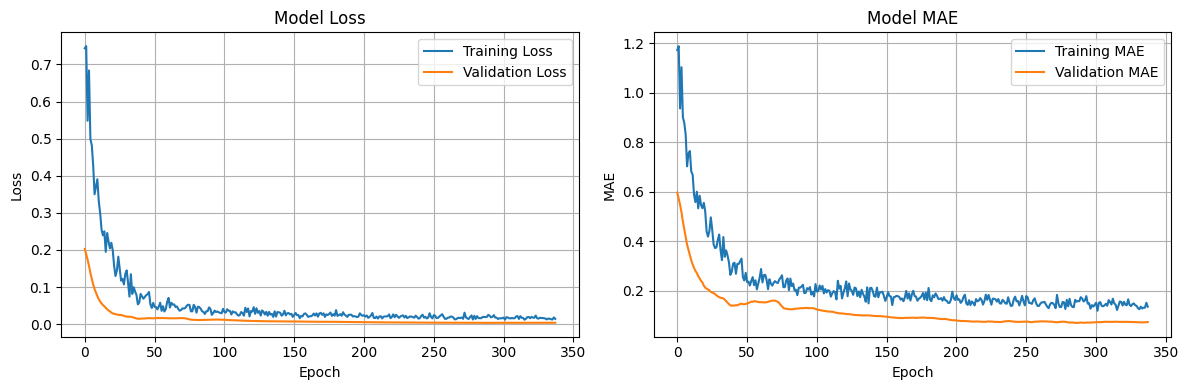

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Model MAE')
plt.grid(True)

plt.tight_layout()
plt.savefig('training_history.png')
print("\nTraining history plot saved as 'training_history.png'")